#### Cross validation

We haven't used cross validation because we would mix up information from the cross validation training and test sets. Nevertheless, we use cross validation here to see if we can improve the model despite of the mentioned problem.

*Aggregation by suburbs*

In [409]:
# Concatenation of training and validation set
X_train_cv = np.concatenate([X_train_suburb, X_valid_suburb])
y_train_cv = np.concatenate([y_train_suburb, y_valid_suburb])

train_cv_tpl = (X_train_cv, y_train_cv)

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.93 / RMSE train 0.07 / MAE train 0.05 / Nobs: 17818
R2 test: 0.62 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451


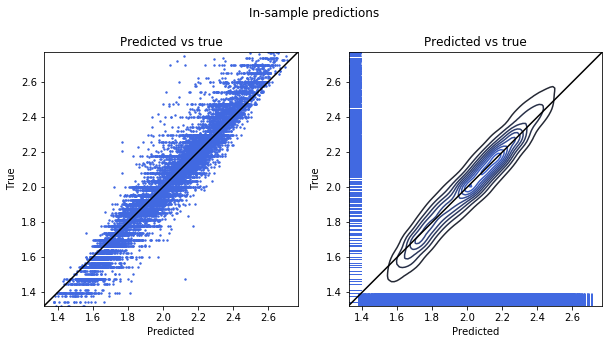

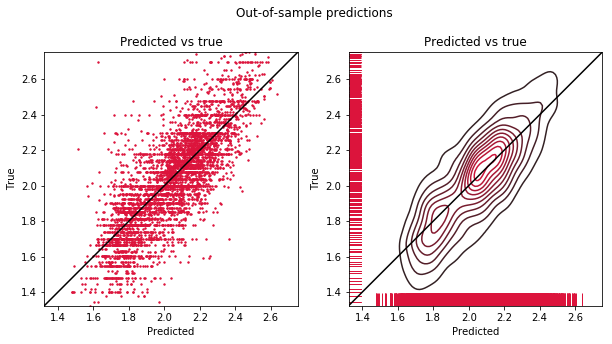

In [410]:
test_tpl = (X_test_suburb, y_test_suburb)
rf_suburb_cv = print_results('RF_suburbs_cv.p', test_tpl, train_cv_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.90 / RMSE train 0.09 / MAE train 0.06 / Nobs: 17818
R2 test: 0.37 / RMSE test 0.21 / MAE test 0.17 / Nobs: 4451


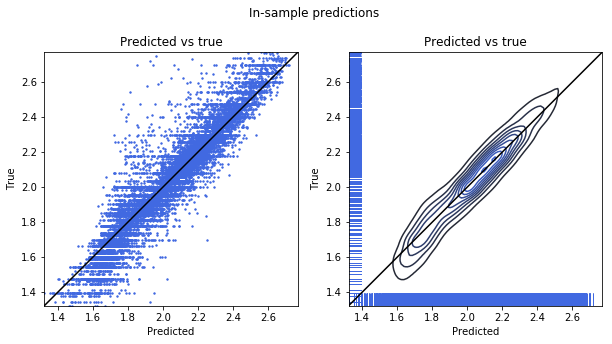

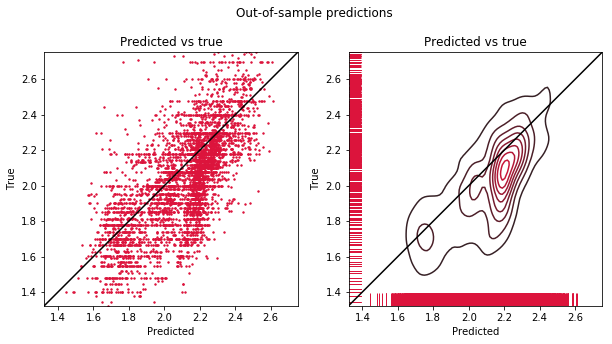

In [411]:
test_tpl = (X_test_suburb, y_test_suburb)
xgb_suburb_cv = print_results('XGB_suburbs_cv.p', test_tpl, train_cv_tpl, None, True)

*Constructed aggregations - 500m*

In [412]:
# Concatenation of training and validation set
X_train_cv = np.concatenate([X_train_500m, X_valid_500m])
y_train_cv = np.concatenate([y_train_500m, y_valid_500m])

train_cv_tpl = (X_train_cv, y_train_cv)

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 0.12 / MAE train 0.09 / Nobs: 16091
R2 test: 0.70 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739


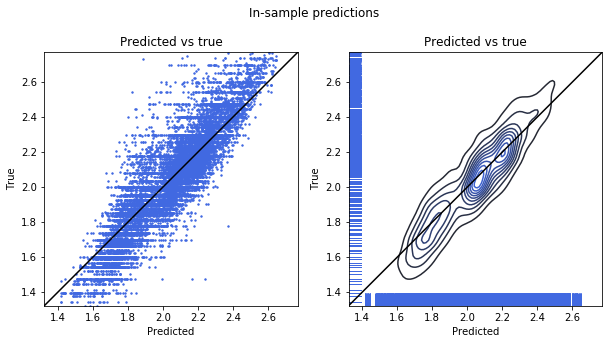

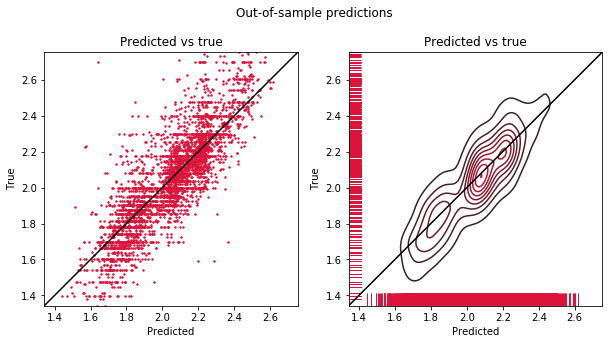

In [413]:
test_tpl = (X_test_500m, y_test_500m)
rf_500m_cv = print_results('RF_500m_cv.p', test_tpl, train_cv_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 0.13 / MAE train 0.09 / Nobs: 16091
R2 test: 0.71 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739


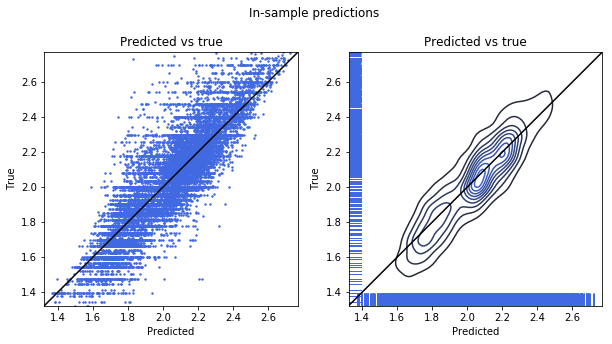

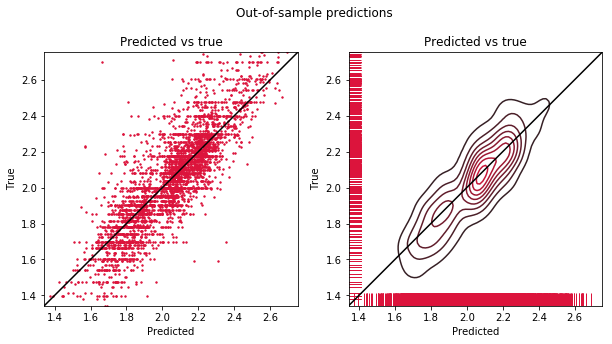

In [414]:
test_tpl = (X_test_500m, y_test_500m)
xgb_500m_cv = print_results('XGB_500m_cv.p', test_tpl, train_cv_tpl, None, True)

Again, we plot the performance measures. The code for the plots is adapted from https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

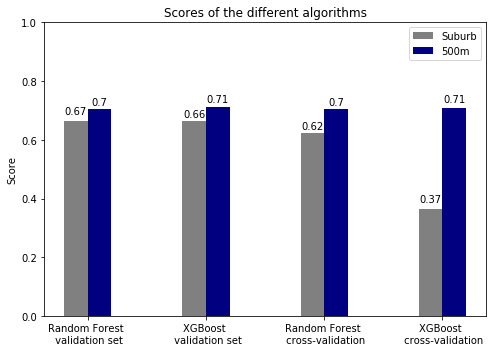

In [415]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

scores_suburb = [rf_suburb['test_r2'],
                 xgb_suburb['test_r2'],
                 rf_suburb_cv['test_r2'],
                 xgb_suburb_cv['test_r2']]

scores_500m = [rf_500m['test_r2'],
               xgb_500m['test_r2'],
               rf_500m_cv['test_r2'],
               xgb_500m_cv['test_r2']]


labels = ['Random Forest \n validation set', 'XGBoost \n validation set', 'Random Forest \n cross-validation', 'XGBoost \n cross-validation']

factor = 1.5
x = np.arange(len(labels))*factor  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 5))
rects1 = ax.bar(x - 0.5*width, scores_suburb, width, label='Suburb', color='grey')
rects2 = ax.bar(x + 0.5*width, scores_500m, width, label='500m', color='navy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of the different algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.0,1])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()